# SiIV Analysis

This is a notebook to be used after happy with the voigt profiling and like the column densites that were calculated 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#plotting things 
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 35

# update various fontsizes to match
params = {'figure.figsize': (20, 14),
          'legend.fontsize': 18,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 10,
          'xtick.minor.size': 6,
          'ytick.major.size': 10,
          'ytick.minor.size': 6}
plt.rcParams.update(params)

import astropy.units as u
from linetools.spectralline import AbsLine
from linetools.spectra import io as lsio
from linetools.isgm.abscomponent import AbsComponent
from linetools.spectra.xspectrum1d import XSpectrum1D
from linetools.lists.linelist import LineList
import glob

In [2]:
#Bring in all the COS-Holes fit data
all_vp_df_J1101 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1101/all_vp.csv')
all_vp_df_J1159 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1159/all_vp.csv')
all_vp_df_J1249 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1249/all_vp.csv')
all_vp_df_J1249 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1249/all_vp.csv')
all_vp_df_J1051 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1051/all_vp.csv')
all_vp_df_J1123 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1123/all_vp.csv')
all_vp_df_J0246 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J0246/all_vp.csv')
all_vp_df_J1235 = pd.read_csv('/Users/samgarza/Documents/COS-Holes/veeper_and_voigt/J1235/all_vp.csv')

In [4]:
#We care about the absorption features that we see around the galaxy so need to input the correct info for each one 
#Used some galaxy criterion to only see the lines that fit what I want to plot 

#DETECTIONS

gal_df_J1159 = all_vp_df_J1159.loc[(all_vp_df_J1159['trans']=='SiIV')]

#J1159 Values 
trans_J1159 = np.array(gal_df_J1159['trans'])
zsys_J1159 = np.array(gal_df_J1159['zsys'])
N_J1159 = np.array(gal_df_J1159['col'])
sigN_J1159 = np.array(gal_df_J1159['sigcol'])
b_J1159 = np.array(gal_df_J1159['bval'])
sigb_J1159 = np.array(gal_df_J1159['sigbval'])
vel_J1159 = np.array(gal_df_J1159['vel'])
sigvel_J1159 = np.array(gal_df_J1159['sigvel'])
wav_J1159 = np.array(gal_df_J1159['restwave'])

#smaller df 
siiv_df_J1159= pd.DataFrame({"Line":trans_J1159, "Wavelength":wav_J1159, "zsys":zsys_J1159, "N":N_J1159, "sigN":sigN_J1159, 
                   "b":b_J1159, "sigb":sigb_J1159, "vel":vel_J1159, "sigvel":sigvel_J1159})
siiv_df_J1159

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,SiIV,1393.7602,-0.00014,13.471,0.035,45.5,4.934,-18.759,3.436
1,SiIV,1402.7729,-0.00014,13.471,0.000,45.5,0.000,-18.759,0.000
2,SiIV,1393.7602,0.00291,12.731,0.124,20.0,10.033,-3.131,6.007
3,SiIV,1402.7729,0.00291,12.731,0.000,20.0,0.000,-3.131,0.000
4,SiIV,1393.7602,0.00334,13.051,0.089,53.3,14.700,-4.440,9.630
5,SiIV,1402.7729,0.00334,13.051,0.000,53.3,0.000,-4.440,0.000


In [5]:
gal_df_J1051 = all_vp_df_J1051.loc[(all_vp_df_J1051['trans']=='SiIV')] 

#J1051 Values 
trans_J1051 = np.array(gal_df_J1051['trans'])
zsys_J1051 = np.array(gal_df_J1051['zsys'])
N_J1051 = np.array(gal_df_J1051['col'])
sigN_J1051 = np.array(gal_df_J1051['sigcol'])
b_J1051 = np.array(gal_df_J1051['bval'])
sigb_J1051 = np.array(gal_df_J1051['sigbval'])
vel_J1051 = np.array(gal_df_J1051['vel'])
sigvel_J1051 = np.array(gal_df_J1051['sigvel'])
wav_J1051 = np.array(gal_df_J1051['restwave'])

#smaller df 
siiv_df_J1051= pd.DataFrame({"Line":trans_J1051, "Wavelength":wav_J1051, "zsys":zsys_J1051, "N":N_J1051, "sigN":sigN_J1051, 
                   "b":b_J1051, "sigb":sigb_J1051, "vel":vel_J1051, "sigvel":sigvel_J1051})
siiv_df_J1051

,Line,Wavelength,zsys,N,sigN,b,sigb,vel,sigvel
0,SiIV,1393.7602,0.00415,13.110,0.068,17.800,4.745,6.094,2.990
1,SiIV,1402.7729,0.00415,13.110,0.000,17.800,0.000,6.094,0.000
2,SiIV,1393.7602,0.00448,13.504,0.035,35.298,4.077,-9.390,2.637
3,SiIV,1402.7729,0.00448,13.504,0.000,35.298,0.000,-9.390,0.000
4,SiIV,1393.7602,-0.00014,13.509,0.045,85.000,10.718,-11.718,7.440
5,SiIV,1402.7729,-0.00014,13.509,0.000,85.000,0.000,-11.718,0.000
6,SiIV,1393.7602,0.00635,13.078,0.082,31.300,8.167,14.452,5.565
7,SiIV,1402.7729,0.00635,13.078,0.000,31.300,0.000,14.452,0.000


In [6]:
#COS-Holes Non Detections 

#Known Galaxy Information

siiv_uplim_df = pd.read_csv('SiIV_upper_limits.csv')
siiv_uplims = np.array(siiv_uplim_df['SiIV_Uplims'])
siiv_uplim_df

,Unnamed: 0,SiIV_Uplims
0,0,12.54
1,1,12.69
2,2,12.83
3,3,13.20
4,4,12.75


In [7]:
#Known Galaxy Information

gal_param_df = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/gal_param.csv')

#getting them out of the table 
gal = np.array(gal_param_df['galaxy'])
s_mass = np.array(gal_param_df['stellar mass'])
bh_mass = np.array(gal_param_df['BH mass'])
rvir = np.array(gal_param_df['Rvir'])
rproj = np.array(gal_param_df['Rproj'])

In [8]:
# #M31 Data (Project AMIGA) Detections (and taking out the MS contaminations) 

amiga_2 = pd.read_csv('/Users/samgarza/Documents/Sam_COSHoles_Analysis/amiga_2_civandsiiv_det_sum.csv')

amiga_2_siiv = amiga_2.loc[(amiga_2['ion']=='Si IV')] #& (amiga_2['ion']=='Si IV')]
amiga_2_siiv

,index,QSO,z,RAdeg,Decdeg,Rad,ion,b_Vel,B_Vel,Vel,e_V,logN,sumlogN,E_logN,e_logN,sum_elogN,f_logN,MS
39,11,RX_J0048.3+3941,0.134,12.079,39.687,25.0,Si IV,-480,-320,0.0,0.0,12.39,13.422574,0.18,0.30,0.301330,-1,-1
40,23,RX_J0048.3+3941,0.134,12.079,39.687,25.0,Si IV,-300,-210,-241.4,0.8,13.16,0.000000,0.02,0.02,0.000000,0,0
41,35,RX_J0048.3+3941,0.134,12.079,39.687,25.0,Si IV,-210,-140,-178.4,0.8,12.98,0.000000,0.02,0.02,0.000000,0,0
42,47,HS0033+4300,0.120,9.096,43.278,30.5,Si IV,-440,-335,-379.0,12.1,13.26,13.808178,0.15,0.23,0.388587,0,-1
43,58,HS0033+4300,0.120,9.096,43.278,30.5,Si IV,-300,-150,-219.3,7.7,13.32,0.000000,0.07,0.09,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,865,PG2349-014,0.174,357.984,-1.154,562.9,Si IV,-320,-280,-298.7,0.6,13.16,0.000000,0.02,0.02,0.000000,0,-1
114,875,PG2349-014,0.174,357.984,-1.154,562.9,Si IV,-280,-250,-267.8,0.8,12.84,0.000000,0.04,0.04,0.000000,0,-1
115,885,PG2349-014,0.174,357.984,-1.154,562.9,Si IV,-250,-190,-227.4,2.4,12.76,0.000000,0.05,0.06,0.000000,0,-1
116,894,PG2349-014,0.174,357.984,-1.154,562.9,Si IV,-190,-145,0.0,0.0,12.13,0.000000,0.18,0.30,0.000000,-1,0


In [9]:
#Getting the SiIV sums, detections and upper limits 
amiga_2_siiv_sum = amiga_2_siiv.loc[(amiga_2_siiv['sumlogN']!= 0) & (amiga_2_siiv['MS']== 0)]

#separating into the tables that I actualy need 
amiga_2_siiv_det = amiga_2_siiv_sum.loc[(amiga_2_siiv_sum['f_logN']!= -1) & (amiga_2_siiv_sum['MS']== 0)]
amiga_2_siiv_up = amiga_2_siiv_sum.loc[(amiga_2_siiv_sum['f_logN']== -1) & (amiga_2_siiv_sum['MS']== 0)]

In [10]:
#Calculating the Project AMIGA Rproj/Rvir so that I can add to future plot 
amiga_m31_rvrir = 230 #kpc 

#Detections
amiga_siiv_det_R = np.array(amiga_2_siiv_det['Rad'])
amiga_siiv_det_RRvir = amiga_siiv_det_R/amiga_m31_rvrir
print(amiga_siiv_det_RRvir)

#Upper Limits 
amiga_siiv_up_R = np.array(amiga_2_siiv_up['Rad'])
amiga_siiv_up_RRvir = amiga_siiv_up_R/amiga_m31_rvrir
print(amiga_siiv_up_RRvir)

[0.21956522 0.91217391 1.61913043]
[0.33521739 0.5726087  0.60478261 0.76304348 0.77347826 1.00695652
 1.05304348 1.35478261 1.4826087  1.71652174 1.78956522 1.81434783
 2.22782609 2.27304348 2.40173913 2.4726087 ]


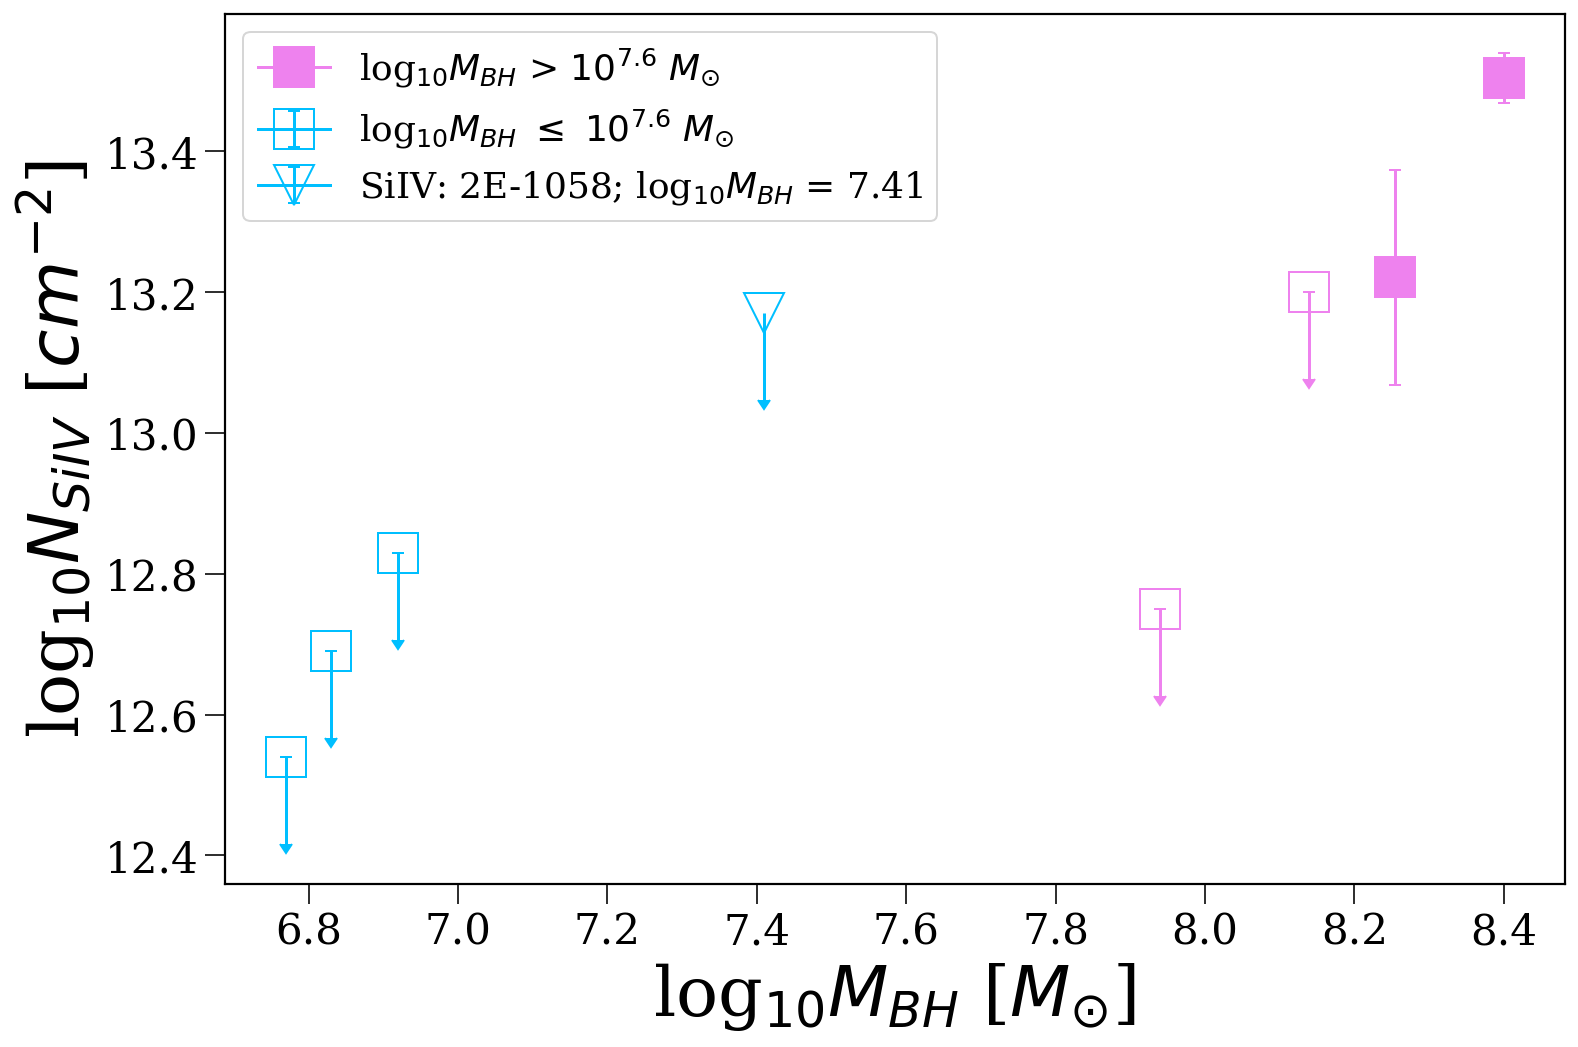

In [11]:
plt.figure(1, figsize=(12,8))

#DETECTIONS

#####J1159 (two features) 
plt.errorbar (bh_mass[1], np.log10(10**siiv_df_J1159['N'][2] + 10**siiv_df_J1159['N'][4]), 
              yerr=np.sqrt(siiv_df_J1159['sigN'][2]**2 + siiv_df_J1159['sigN'][4]**2), capsize = 3, c = 'violet', 
              marker="s", markersize=20)

#####J1051 (two features)
plt.errorbar(bh_mass[5], siiv_df_J1051['N'][2], yerr= siiv_df_J1051['sigN'][2], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker="s", markersize=20)

##################################################################

#####  NON DETECTIONS  

###### J1101
plt.errorbar(bh_mass[0], siiv_uplims[0], yerr=siiv_df_J1159['sigN'][2], capsize = 3, c = 'deepskyblue', 
             label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$',
             uplims=True, marker="s", mfc='none', markersize=20)

#####J1249
#SiIV
plt.errorbar(bh_mass[4], siiv_uplims[1], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue', 
             marker="s", mfc='none', markersize=20)

#####J1123
plt.errorbar(bh_mass[6], siiv_uplims[2], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue',
             marker="s", mfc='none', markersize=20)

###### J0246
plt.errorbar(bh_mass[7], siiv_uplims[3], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet',
             marker="s", mfc='none', markersize=20)

#####J1235 - NGC 4564 (8)
plt.errorbar (bh_mass[8], siiv_uplims[4], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet', 
              marker="s",mfc='none',markersize=20)


############# Si IV Upper Limit from singular archive galaxy UGC 6093 - 2E1058
plt.errorbar (7.41, 13.17, yerr=siiv_df_J1159['sigN'][2],uplims=True, c = 'deepskyblue', 
              marker="v",mfc='none',markersize=20, label = 'SiIV: 2E-1058; log$_{10}M_{BH}$ = 7.41')

########################################################

#plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
#plt.ylim(12.5, 14.55)
#plt.xlim(0, 300)
plt.xlabel ('log$_{10}M_{BH}$ [$M_{\odot}$]')
plt.ylabel ('log$_{10}N_{SiIV}$ [$cm^{-2}$]')
#plt.title('COS-Holes and Archive Find', fontsize = 25)
plt.legend(loc=2)
#plt.grid(True)
plt.show()

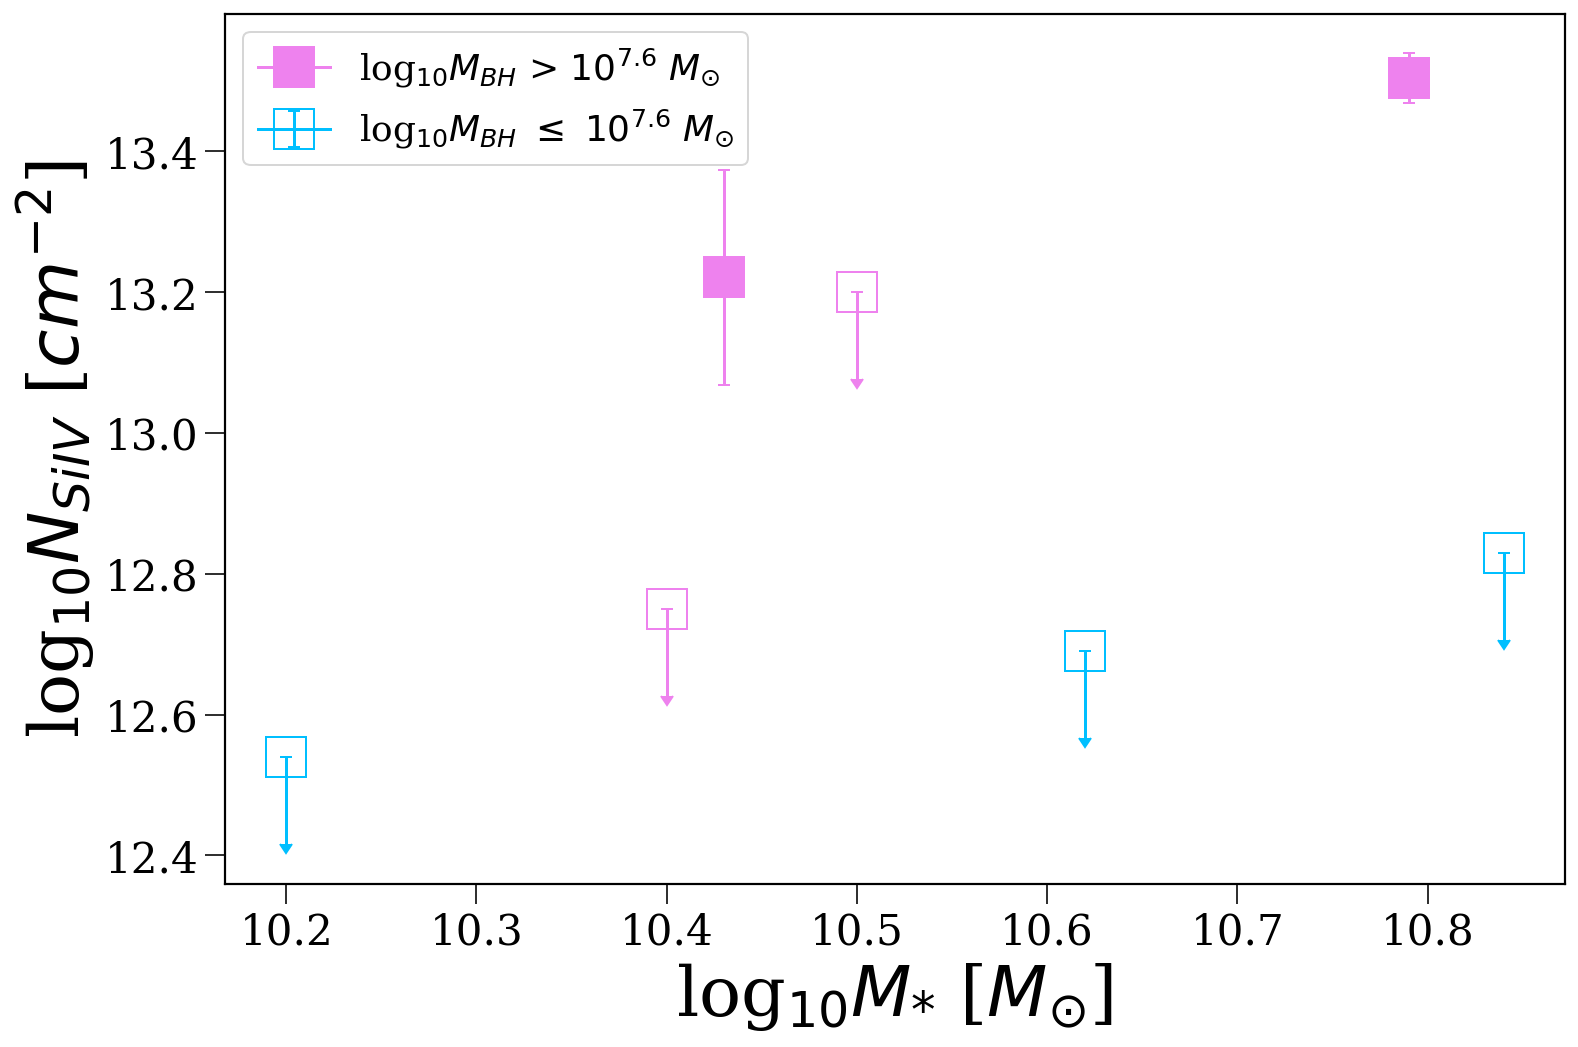

In [12]:
plt.figure(1, figsize=(12,8))

#DETECTIONS

#####J1159 (two features) 
plt.errorbar (s_mass[1], np.log10(10**siiv_df_J1159['N'][2] + 10**siiv_df_J1159['N'][4]), 
              yerr=np.sqrt(siiv_df_J1159['sigN'][2]**2 + siiv_df_J1159['sigN'][4]**2), capsize = 3, c = 'violet', 
              marker="s", markersize=20)

#####J1051 (two features)
plt.errorbar(s_mass[5], siiv_df_J1051['N'][2], yerr= siiv_df_J1051['sigN'][2], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker="s", markersize=20)

##################################################################

#####  NON DETECTIONS  

###### J1101
plt.errorbar(s_mass[0], siiv_uplims[0], yerr=siiv_df_J1159['sigN'][2], capsize = 3, c = 'deepskyblue', 
             label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$',
             uplims=True, marker="s", mfc='none', markersize=20)

#####J1249
#SiIV
plt.errorbar(s_mass[4], siiv_uplims[1], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue', 
             marker="s", mfc='none', markersize=20)

#####J1123
plt.errorbar(s_mass[6], siiv_uplims[2], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue',
             marker="s", mfc='none', markersize=20)

###### J0246
plt.errorbar(s_mass[7], siiv_uplims[3], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet',
             marker="s", mfc='none', markersize=20)

#####J1235 - NGC 4564 (8)
plt.errorbar (s_mass[8], siiv_uplims[4], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet', 
              marker="s",mfc='none',markersize=20)


############# Si IV Upper Limit from singular archive galaxy UGC 6093 - 2E1058
'''plt.errorbar (7.41, np.log10(10**13.17+10**13.41), yerr=siiv_df_J1159['sigN'][2],uplims=True, c = 'deepskyblue', 
              marker="v",mfc='none',markersize=20, label = 'SiIV: 2E-1058')'''

########################################################

#plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
#plt.ylim(12.5, 14.55)
#plt.xlim(0, 300)
plt.xlabel ('log$_{10}M_{*}$ [$M_{\odot}$]')
plt.ylabel ('log$_{10}N_{SiIV}$ [$cm^{-2}$]')
#plt.title('COS-Holes and Archive Find', fontsize = 25)
plt.legend(loc=2)
#plt.grid(True)
plt.show()

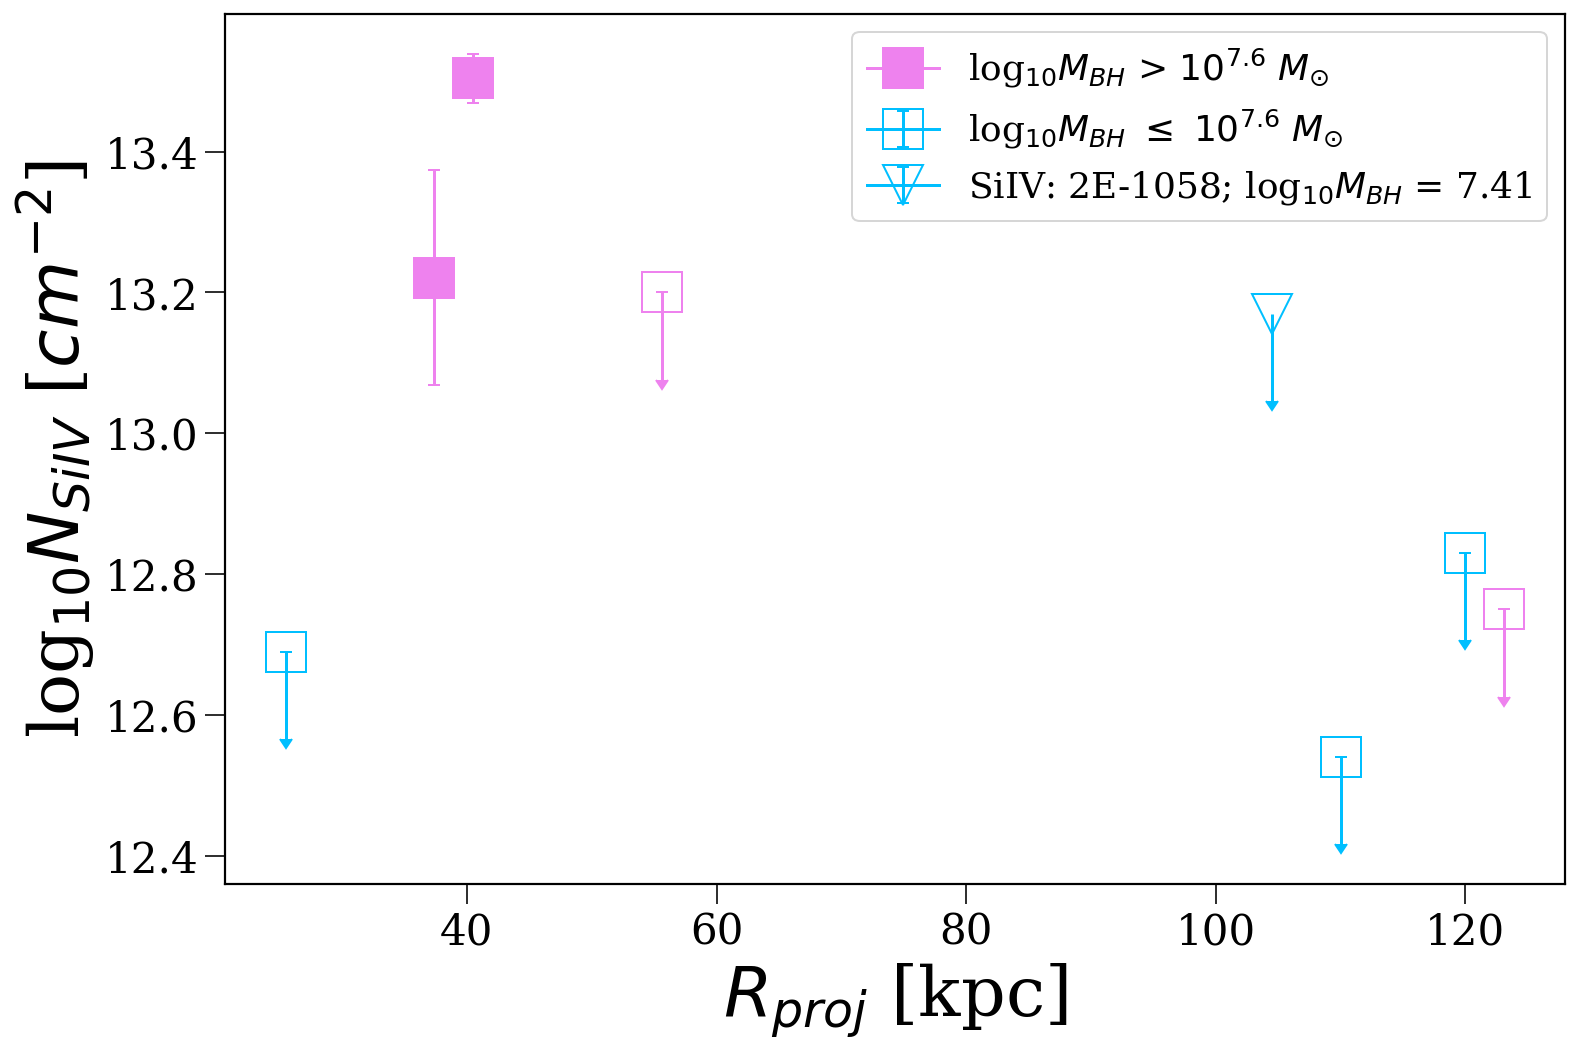

In [13]:
#Now I guess we can start plotting some things.... Lets make Fig 4 (LHS- N vs Rproj) from COS-Holes Proposal 

plt.figure(1, figsize=(12,8))

#DETECTIONS

#####J1159 (two features) 
plt.errorbar (rproj[1], np.log10(10**siiv_df_J1159['N'][2] + 10**siiv_df_J1159['N'][4]), 
              yerr=np.sqrt(siiv_df_J1159['sigN'][2]**2 + siiv_df_J1159['sigN'][4]**2), capsize = 3, c = 'violet', 
              marker="s", markersize=20)

#####J1051 (two features)
plt.errorbar(rproj[5], siiv_df_J1051['N'][2], yerr= siiv_df_J1051['sigN'][2], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker="s", markersize=20)

##################################################################

#####  NON DETECTIONS  

###### J1101
plt.errorbar(rproj[0], siiv_uplims[0], yerr=siiv_df_J1159['sigN'][2], capsize = 3, c = 'deepskyblue', 
             label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$',
             uplims=True, marker="s", mfc='none', markersize=20)

#####J1249
#SiIV
plt.errorbar(rproj[4], siiv_uplims[1], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue', 
             marker="s", mfc='none', markersize=20)

#####J1123
plt.errorbar(rproj[6], siiv_uplims[2], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue',
             marker="s", mfc='none', markersize=20)

###### J0246
plt.errorbar(rproj[7], siiv_uplims[3], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet',
             marker="s", mfc='none', markersize=20)

#####J1235 - NGC 4564 (8)
plt.errorbar (rproj[8], siiv_uplims[4], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet', 
              marker="s",mfc='none',markersize=20)


############# Si IV Upper Limit from singular archive galaxy UGC 6093 - 2E1058
plt.errorbar (104.50348, 13.17, yerr=siiv_df_J1159['sigN'][2],uplims=True, c = 'deepskyblue', 
              marker="v",mfc='none',markersize=20, label = 'SiIV: 2E-1058; log$_{10}M_{BH}$ = 7.41')

########################################################

#plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
#plt.ylim(12.5, 14.55)
#plt.xlim(0, 300)
plt.xlabel ('$R_{proj}$ [kpc]')
plt.ylabel ('log$_{10}N_{SiIV}$ [$cm^{-2}$]')
#plt.title('COS-Holes and Archive Find', fontsize = 25)
plt.legend(loc=1)
#plt.grid(True)
plt.show()

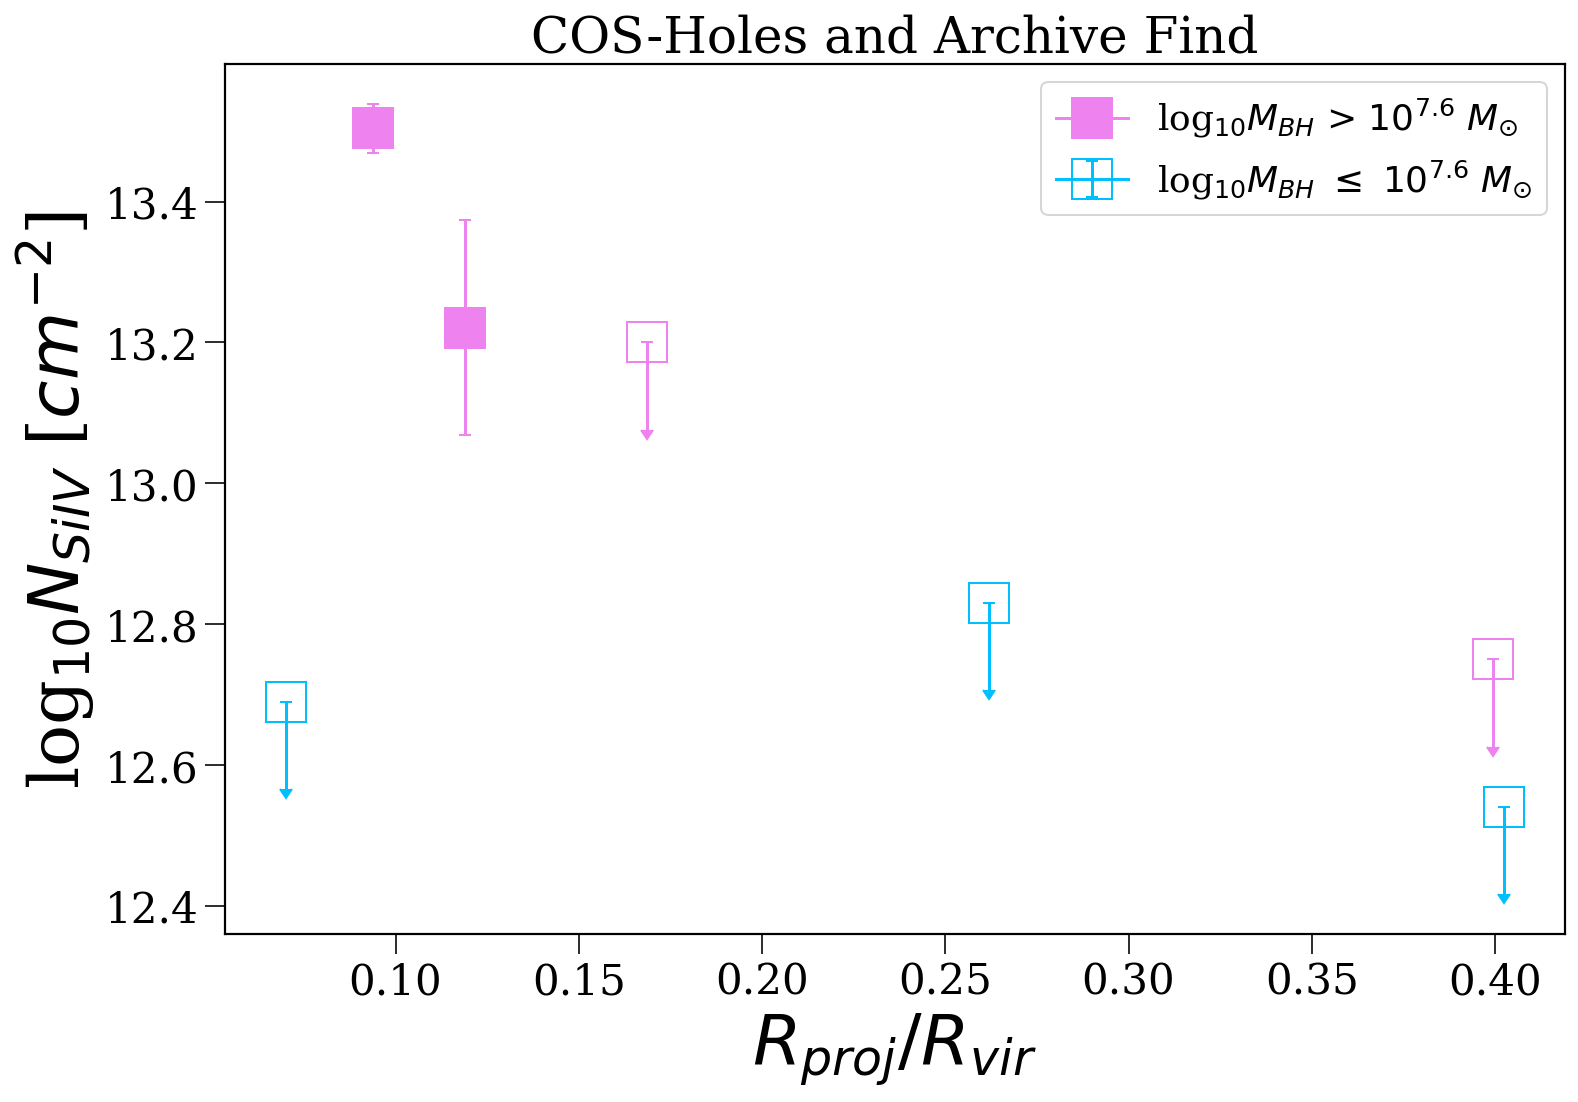

In [14]:
#Now I guess we can start plotting some things.... Lets make Fig 4 (RHS- N vs Rproj/Rvir) from COS-Holes Proposal 

plt.figure(1, figsize=(12,8))

#DETECTIONS

#####J1159 (two features) 
plt.errorbar (rproj[1]/rvir[1], np.log10(10**siiv_df_J1159['N'][2] + 10**siiv_df_J1159['N'][4]), 
              yerr=np.sqrt(siiv_df_J1159['sigN'][2]**2 + siiv_df_J1159['sigN'][4]**2), capsize = 3, c = 'violet', 
              marker="s", markersize=20)

#####J1051 (two features)
plt.errorbar(rproj[5]/rvir[5], siiv_df_J1051['N'][2], yerr= siiv_df_J1051['sigN'][2], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker="s", markersize=20)

##################################################################

#####  NON DETECTIONS  

###### J1101
plt.errorbar(rproj[0]/rvir[0], siiv_uplims[0], yerr=siiv_df_J1159['sigN'][2], capsize = 3, c = 'deepskyblue', 
             label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$',
             uplims=True, marker="s", mfc='none', markersize=20)

#####J1249
#SiIV
plt.errorbar(rproj[4]/rvir[4], siiv_uplims[1], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue', 
             marker="s", mfc='none', markersize=20)

#####J1123
plt.errorbar(rproj[6]/rvir[6], siiv_uplims[2], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue',
             marker="s", mfc='none', markersize=20)

###### J0246
plt.errorbar(rproj[7]/rvir[7], siiv_uplims[3], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet',
             marker="s", mfc='none', markersize=20)

#####J1235 - NGC 4564 (8)
plt.errorbar (rproj[8]/rvir[8], siiv_uplims[4], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet', 
              marker="s",mfc='none',markersize=20)


############# Si IV Upper Limit from singular archive galaxy UGC 6093 - 2E1058
'''plt.errorbar (104.50348, np.log10(10**13.17+10**13.41), yerr=siiv_df_J1159['sigN'][2],uplims=True, c = 'deepskyblue', 
              marker="v",mfc='none',markersize=20, label = 'SiIV: 2E-1058')'''

########################################################

#plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
#plt.ylim(12.5, 14.55)
#plt.xlim(0, 300)
plt.xlabel ('$R_{proj}/R_{vir}$')
plt.ylabel ('log$_{10}N_{SiIV}$ [$cm^{-2}$]')
plt.title('COS-Holes and Archive Find', fontsize = 25)
plt.legend(loc=1)
#plt.grid(True)
plt.show()

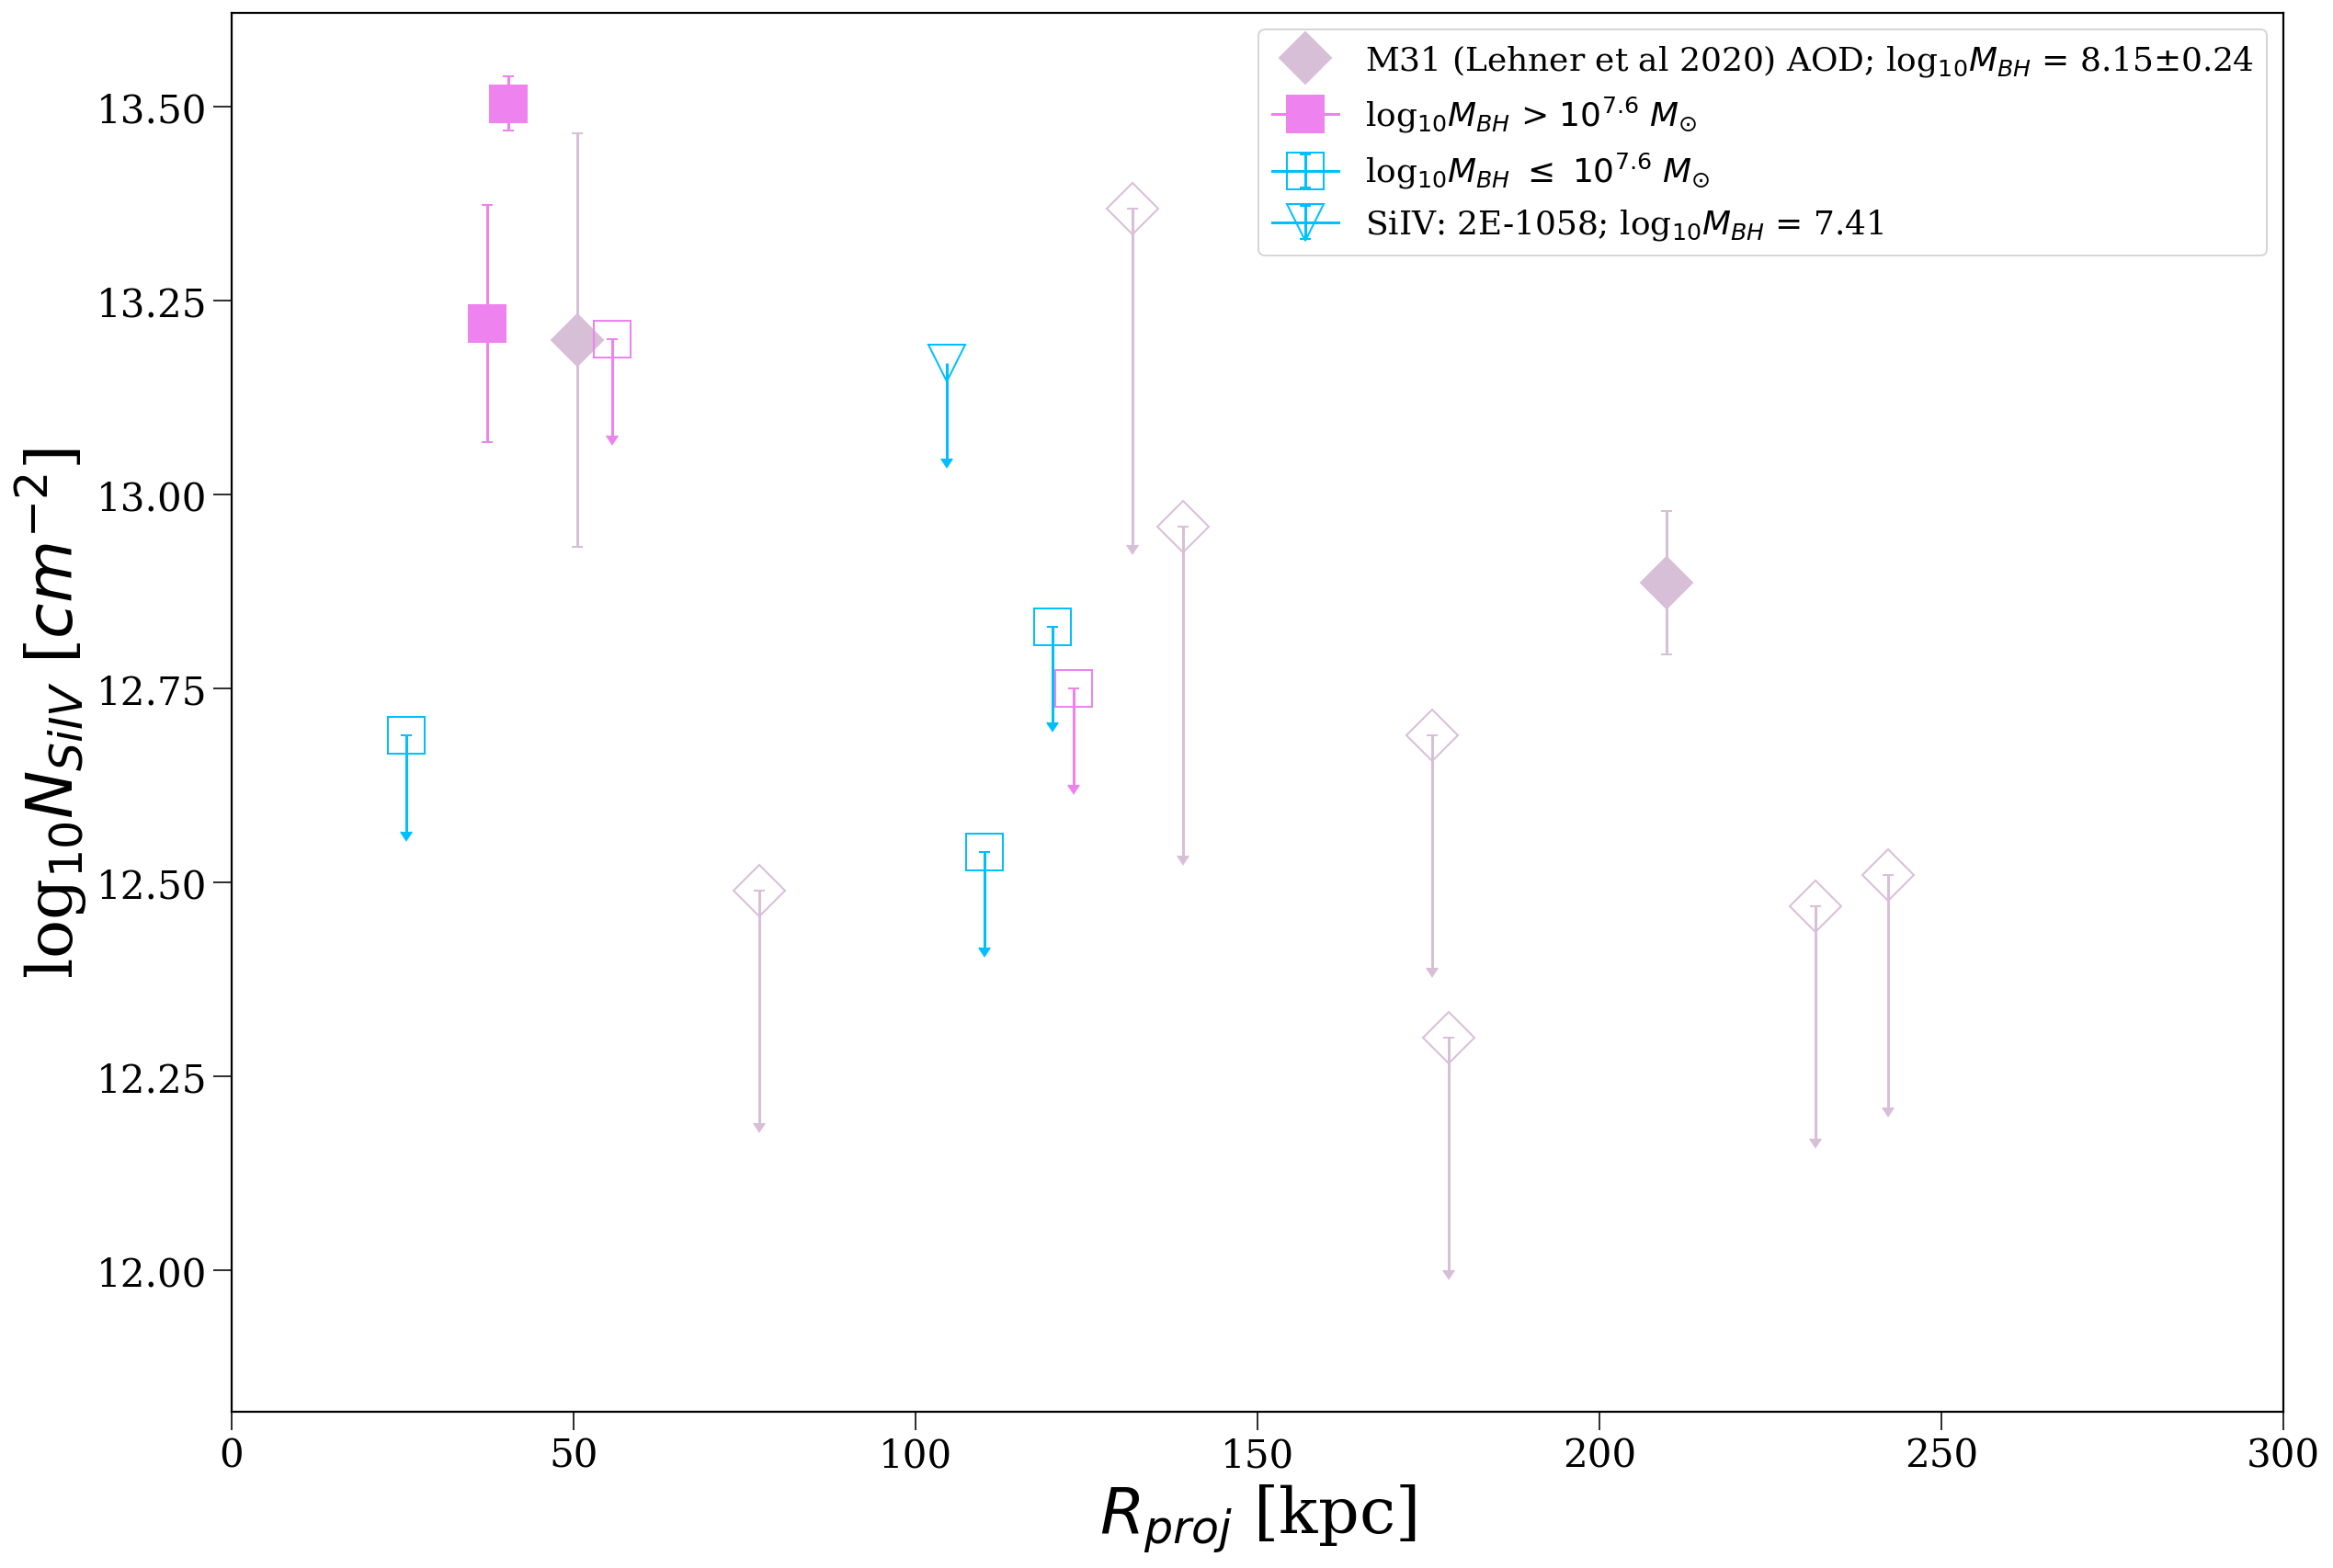

In [15]:
#Now I guess we can start plotting some things.... Lets make Fig 4 (LHS- N vs Rproj) from COS-Holes Proposal 


########### Plotting Project AMIGA SiIV Data 

#SiIV Detections
plt.errorbar(amiga_2_siiv_det['Rad'], amiga_2_siiv_det['sumlogN'], yerr= amiga_2_siiv_det['sum_elogN'], 
             capsize = 3, c = 'thistle', label='M31 (Lehner et al 2020) AOD; log$_{10}M_{BH}$ = 8.15$\pm$0.24', marker="D", 
             markersize=20, ls='none')
#SiIV Upper Limits 
plt.errorbar(amiga_2_siiv_up['Rad'], amiga_2_siiv_up['sumlogN'], yerr= amiga_2_siiv_up['sum_elogN'], 
             capsize = 3, c = 'thistle', marker="D", mfc='none', uplims=True, markersize=20, ls='none')

##################################################################

# COS-Holes DETECTIONS

#####J1159 (two features) 
plt.errorbar (rproj[1], np.log10(10**siiv_df_J1159['N'][2] + 10**siiv_df_J1159['N'][4]), 
              yerr=np.sqrt(siiv_df_J1159['sigN'][2]**2 + siiv_df_J1159['sigN'][4]**2), capsize = 3, c = 'violet', 
              marker="s", markersize=20)

#####J1051 (two features)
plt.errorbar(rproj[5], siiv_df_J1051['N'][2], yerr= siiv_df_J1051['sigN'][2], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker="s", markersize=20)

##################################################################

#####  NON DETECTIONS  

###### J1101
plt.errorbar(rproj[0], siiv_uplims[0], yerr=siiv_df_J1159['sigN'][2], capsize = 3, c = 'deepskyblue', 
             label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$',
             uplims=True, marker="s", mfc='none', markersize=20)

#####J1249
#SiIV
plt.errorbar(rproj[4], siiv_uplims[1], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue', 
             marker="s", mfc='none', markersize=20)

#####J1123
plt.errorbar(rproj[6], siiv_uplims[2], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue',
             marker="s", mfc='none', markersize=20)

###### J0246
plt.errorbar(rproj[7], siiv_uplims[3], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet',
             marker="s", mfc='none', markersize=20)

#####J1235 - NGC 4564 (8)
plt.errorbar (rproj[8], siiv_uplims[4], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet', 
              marker="s",mfc='none',markersize=20)


############# Si IV Upper Limit from singular archive galaxy UGC 6093 - 2E1058
plt.errorbar (104.50348, 13.17, yerr=siiv_df_J1159['sigN'][2],uplims=True, c = 'deepskyblue', 
              marker="v",mfc='none',markersize=20, label = 'SiIV: 2E-1058; log$_{10}M_{BH}$ = 7.41')

########################################################

#plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
#plt.ylim(12.5, 14.55)
plt.xlim(0, 300)
plt.xlabel ('$R_{proj}$ [kpc]')
plt.ylabel ('log$_{10}N_{SiIV}$ [$cm^{-2}$]')
#plt.title('COS-Holes and Archive Find', fontsize = 25)
plt.legend(loc=1)
#plt.grid(True)
plt.show()

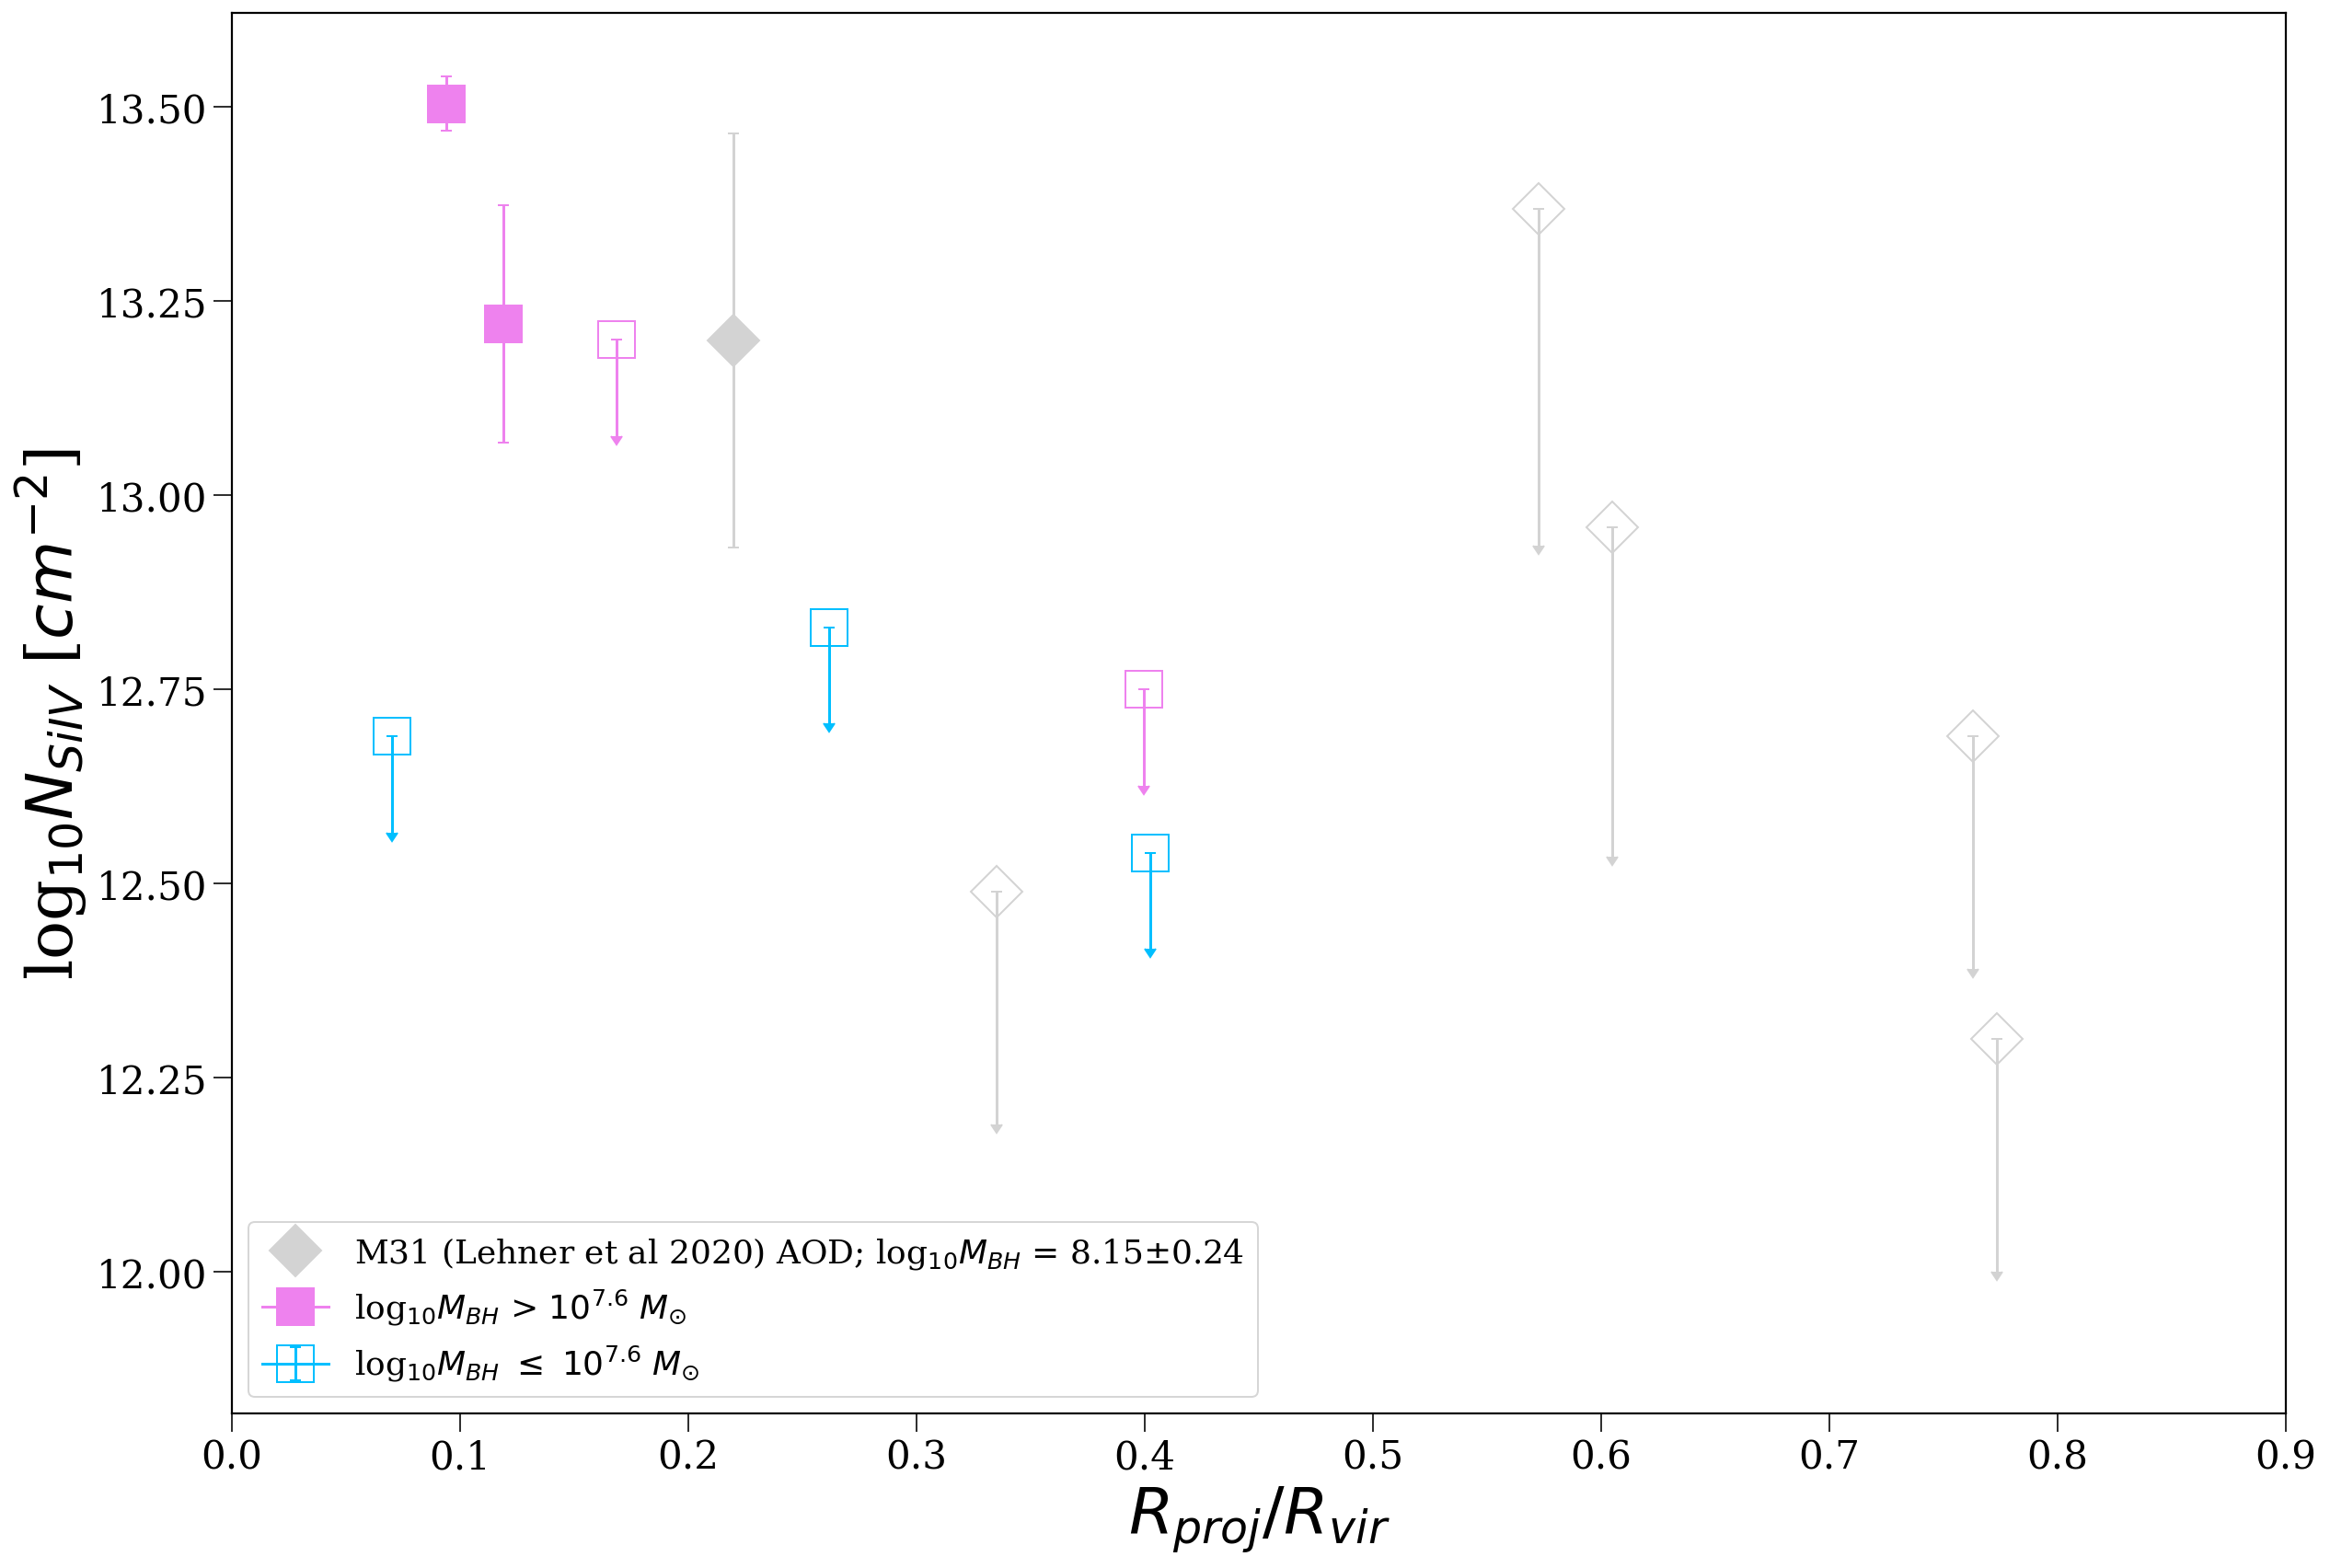

In [16]:
#Now I guess we can start plotting some things.... Lets make Fig 4 (LHS- N vs Rproj) from COS-Holes Proposal 


########### Plotting Project AMIGA SiIV Data 

#SiIV Detections
plt.errorbar(amiga_siiv_det_RRvir, amiga_2_siiv_det['sumlogN'], yerr= amiga_2_siiv_det['sum_elogN'], 
             capsize = 3, c = 'lightgrey', label='M31 (Lehner et al 2020) AOD; log$_{10}M_{BH}$ = 8.15$\pm$0.24', marker="D", 
             markersize=20, ls='none')
#SiIV Upper Limits 
plt.errorbar(amiga_siiv_up_RRvir, amiga_2_siiv_up['sumlogN'], yerr= amiga_2_siiv_up['sum_elogN'], 
             capsize = 3, c = 'lightgrey', marker="D", mfc='none', uplims=True, markersize=20, ls='none')

##################################################################

# COS-Holes DETECTIONS

#####J1159 (two features) 
plt.errorbar (rproj[1]/rvir[1], np.log10(10**siiv_df_J1159['N'][2] + 10**siiv_df_J1159['N'][4]), 
              yerr=np.sqrt(siiv_df_J1159['sigN'][2]**2 + siiv_df_J1159['sigN'][4]**2), capsize = 3, c = 'violet', 
              marker="s", markersize=20)

#####J1051 (two features)
plt.errorbar(rproj[5]/rvir[5], siiv_df_J1051['N'][2], yerr= siiv_df_J1051['sigN'][2], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker="s", markersize=20)

##################################################################

#####  NON DETECTIONS  

###### J1101
plt.errorbar(rproj[0]/rvir[0], siiv_uplims[0], yerr=siiv_df_J1159['sigN'][2], capsize = 3, c = 'deepskyblue', 
             label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$',
             uplims=True, marker="s", mfc='none', markersize=20)

#####J1249
#SiIV
plt.errorbar(rproj[4]/rvir[4], siiv_uplims[1], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue', 
             marker="s", mfc='none', markersize=20)

#####J1123
plt.errorbar(rproj[6]/rvir[6], siiv_uplims[2], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue',
             marker="s", mfc='none', markersize=20)

###### J0246
plt.errorbar(rproj[7]/rvir[7], siiv_uplims[3], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet',
             marker="s", mfc='none', markersize=20)

#####J1235 - NGC 4564 (8)
plt.errorbar (rproj[8]/rvir[8], siiv_uplims[4], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet', 
              marker="s",mfc='none',markersize=20)


############# Si IV Upper Limit from singular archive galaxy UGC 6093 - 2E1058
'''plt.errorbar (104.50348, 13.17, yerr=siiv_df_J1159['sigN'][2],uplims=True, c = 'deepskyblue', 
              marker="v",mfc='none',markersize=20, label = 'SiIV: 2E-1058; log$_{10}M_{BH}$ = 7.41')'''

########################################################

#plt.axhline(13.3, c='k', ls=':', label='COSHoles Detection Limit')
#plt.axvline(150, c='k', ls='-')
#plt.ylim(12.5, 14.55)
plt.xlim(0, 0.9)
plt.xlabel ('$R_{proj}/R_{vir}$')
plt.ylabel ('log$_{10}N_{SiIV}$ [$cm^{-2}$]')
#plt.title('COS-Holes and Archive Find', fontsize = 25)
plt.legend(loc=3)
#plt.grid(True)
plt.show()

In [ ]:
#PRELIMINARY NSiIV vs SFR (waiting to hear back from Terrazas
#SFR from Terrazas et al. 2017: https://iopscience.iop.org/article/10.3847/1538-4357/aa7d07/pdf

plt.figure(1, figsize=(12,8))

########### Plotting COS-Holes Data

#J1159
plt.errorbar(-1.767, np.log10(10**siiv_df_J1159['N'][2] + 10**siiv_df_J1159['N'][4]), 
             yerr=civ_df_J1159['sigN'][0], 
             capsize = 3, c = 'violet', marker=".", markersize=40)

#J1249
plt.errorbar(-0.061, np.log10(10**civ_df_J1249['N'][2] + 10**civ_df_J1249['N'][4] + 10**civ_df_J1249['N'][6]), 
             yerr= np.sqrt(civ_df_J1249['sigN'][2]**2 + civ_df_J1249['sigN'][4]**2 + civ_df_J1249['sigN'][6]**2), 
             capsize = 3, c = 'deepskyblue', label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1051
plt.errorbar(-1.047, civ_df_J1051['N'][6], yerr= civ_df_J1051['sigN'][6], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker=".", markersize=40)

#J1123
plt.errorbar(0.536, civ_df_J1123['N'][2], yerr=civ_df_J1123['sigN'][2], capsize = 3, c = 'deepskyblue',
             marker=".", markersize=40)

#J0246
plt.errorbar(0.766, civ_df_J0246['N'][2], yerr=civ_df_J0246['sigN'][2], capsize = 3, c = 'violet',
             marker=".", markersize=40)

##################################################################
##### Upper Limits

'''#J1101 - NGC 3489 (0) (DETECTION UPPER LIMIT)
plt.errorbar(s_mass[0], civ_df_J1101['N'][4], yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'deepskyblue', 
             marker=".", capsize = 3, markersize=40)'''

#J1235 - NGC 4564 (8)
plt.errorbar (-1.988, np.log10(10**13.17+10**13.48), yerr=civ_df_J1101['sigN'][4], uplims=True, c = 'violet', 
              marker=".",mfc='none', capsize = 3, markersize=40)

plt.xlabel ('log$_{10}$SFR [$M_{\odot} yr^{-1}$]')
plt.ylabel ('log$_{10}N_{CIV}$ [$cm^{-2}$]')
plt.legend(loc=2)
plt.grid(True)
plt.show()

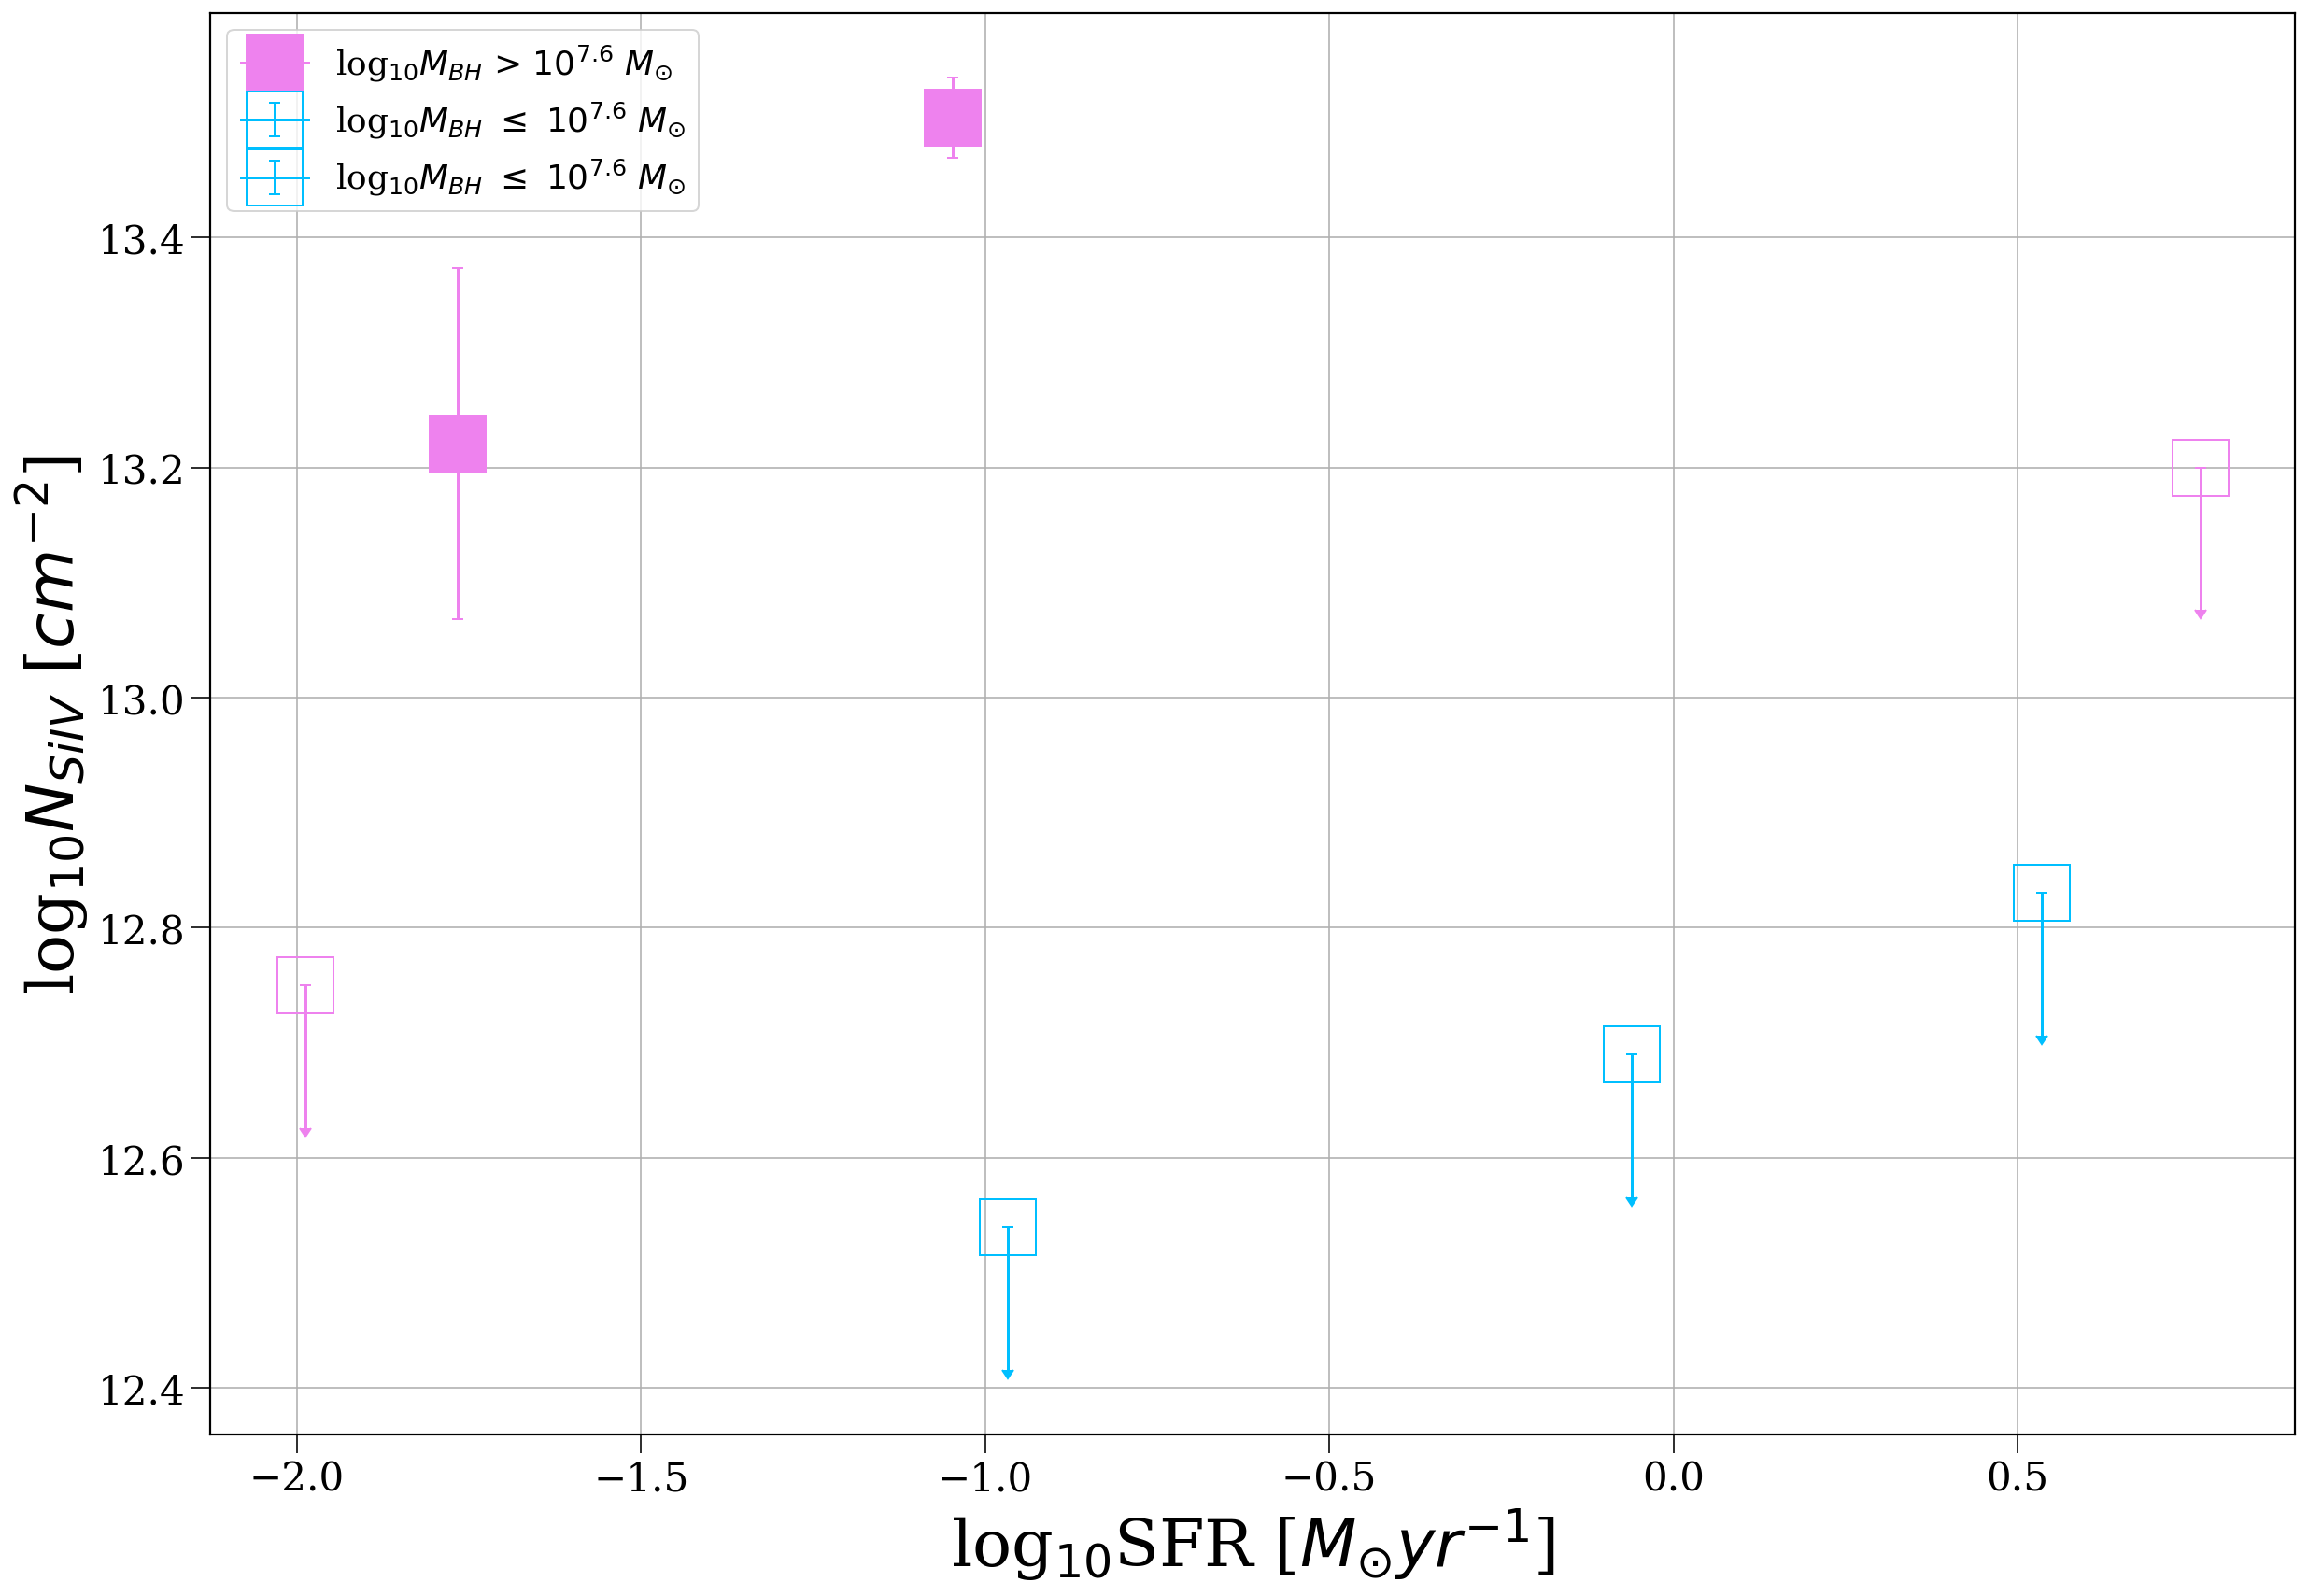

In [21]:
##################################################################

# COS-Holes DETECTIONS

#####J1159 (two features) 
plt.errorbar (-1.767, np.log10(10**siiv_df_J1159['N'][2] + 10**siiv_df_J1159['N'][4]), 
              yerr=np.sqrt(siiv_df_J1159['sigN'][2]**2 + siiv_df_J1159['sigN'][4]**2), capsize = 3, c = 'violet', 
              marker="s", markersize=30)

#####J1051 (two features)
plt.errorbar(-1.047, siiv_df_J1051['N'][2], yerr= siiv_df_J1051['sigN'][2], capsize = 3, c = 'violet', 
             label = 'log$_{10}M_{BH}$ > $10^{7.6}$ $M_{\odot}$', marker="s", markersize=30)

##################################################################

#####  NON DETECTIONS  

###### J1101
plt.errorbar(-0.967, siiv_uplims[0], yerr=siiv_df_J1159['sigN'][2], capsize = 3, c = 'deepskyblue', 
             label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$',
             uplims=True, marker="s", mfc='none', markersize=30)

#####J1249
#SiIV
plt.errorbar(-0.061, siiv_uplims[1], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue', 
             label = 'log$_{10}M_{BH}$ $\leq$ $10^{7.6}$ $M_{\odot}$', marker="s", mfc='none', markersize=30)

#####J1123
plt.errorbar(0.536, siiv_uplims[2], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'deepskyblue',
             marker="s", mfc='none', markersize=30)

###### J0246
plt.errorbar(0.766, siiv_uplims[3], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet',
             marker="s", mfc='none', markersize=30)

#####J1235 - NGC 4564 (8)
plt.errorbar (-1.988, siiv_uplims[4], yerr=siiv_df_J1159['sigN'][2], uplims=True, capsize = 3, c = 'violet', 
              marker="s",mfc='none',markersize=30)


############# Si IV Upper Limit from singular archive galaxy UGC 6093 - 2E1058
'''plt.errorbar (104.50348, 13.17, yerr=siiv_df_J1159['sigN'][2],uplims=True, c = 'deepskyblue', 
              marker="v",mfc='none',markersize=20, label = 'SiIV: 2E-1058; log$_{10}M_{BH}$ = 7.41')'''

########################################################

plt.xlabel ('log$_{10}$SFR [$M_{\odot} yr^{-1}$]')
plt.ylabel ('log$_{10}N_{SiIV}$ [$cm^{-2}$]')
plt.legend(loc=2)
plt.grid(True)
plt.show()